In [29]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
file_path = '/home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_10_56_2T3W1RFV0MC103811following_real_vehicle_FollowerstopperMax.bag'
b = bagreader(file_path)

[INFO]  Data folder /home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_10_56_2T3W1RFV0MC103811following_real_vehicle_FollowerstopperMax already exists. Not creating.


In [31]:
filename = file_path.split('/')[-1]

In [32]:
b.topic_table

Topics                       Types  Message Count     Frequency
0            /accel            std_msgs/Float64          23798    179.689144
1        /cmd_accel            std_msgs/Float64          23696    349.001831
2          /cmd_vel         geometry_msgs/Twist           4753     19.959380
3         /commands            std_msgs/Float64          23809    100.014403
4        /highbeams            std_msgs/Float64            238      0.999849
5        /lead_dist            std_msgs/Float64           2380     72.624868
6           /region              std_msgs/UInt8           4753     19.959475
7          /rel_vel         geometry_msgs/Twist           1782     23.525838
8           /rosout           rosgraph_msgs/Log             10  22919.693989
9       /rosout_agg           rosgraph_msgs/Log              9  25575.024390
10  /steering_angle            std_msgs/Float64          23821    100.773744
11     /timheadway1            std_msgs/Float64           4753     19.957623
12        /track_a0  geometry_msgs/PointStamped           4767     19.992678
13        /track_a1  geometry_msgs/PointStamped           4767     19.988915
14       /track_a10  geometry_msgs/PointStamped           4765     19.987200
15       /track_a11  geometry_msgs/PointStamped           4765     19.962705
16       /track_a12  geometry_msgs/PointStamped           4762     19.973732
17       /track_a13  geometry_msgs/PointStamped           4762     19.964795
18       /track_a14  geometry_msgs/PointStamped           4762     19.980869
19       /track_a15  geometry_msgs/PointStamped           4760     19.960900
20        /track_a2  geometry_msgs/PointStamped           4767     19.996157
21        /track_a3  geometry_msgs/PointStamped           4767     19.980583
22        /track_a4  geometry_msgs/PointStamped           4765     19.998160
23        /track_a5  geometry_msgs/PointStamped           4767     19.972163
24        /track_a6  geometry_msgs/PointStamped           4765     19.973066
25        /track_a7  geometry_msgs/PointStamped           4765     19.984819
26        /track_a8  geometry_msgs/PointStamped           4767     19.972163
27        /track_a9  geometry_msgs/PointStamped           4767     19.972115
28             /vel         geometry_msgs/Twist          11904     50.045986

In [33]:
CMD_ACC_MSG = b.message_by_topic('/cmd_accel') #commanded accel
ACC_MSG = b.message_by_topic('/accel') # car accel
# GHOST_VEL_MSG = b.message_by_topic('/ghost/vehicle/vel')
LEAD_DIST = b.message_by_topic('/lead_dist') #lead dist
VEL_MSG = b.message_by_topic('/vel') # velocty 
TH_MSG = b.message_by_topic('/timheadway1')
CMD_VEL = b.message_by_topic('/cmd_vel')

In [34]:
df_cacc = pd.read_csv(CMD_ACC_MSG)
df_acc = pd.read_csv(ACC_MSG)
# df_gvel = pd.read_csv(GHOST_VEL_MSG)
df_lead_dist = pd.read_csv(LEAD_DIST)
df_vel = pd.read_csv(VEL_MSG)
df_th_msg = pd.read_csv(TH_MSG)
df_cmd_vel = pd.read_csv(CMD_VEL)
t0 = df_vel['Time'][0]

In [35]:
# df_vel

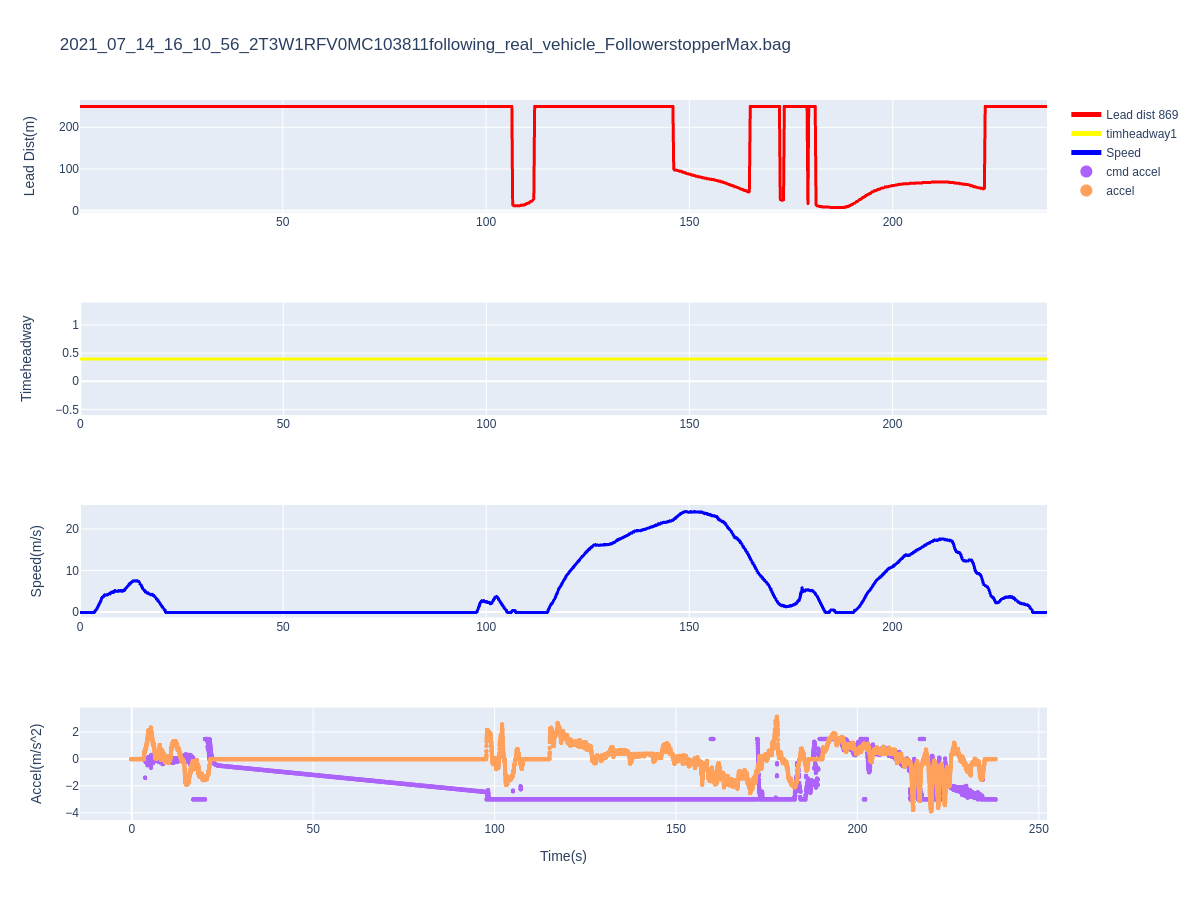

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figr = make_subplots(rows=4, cols=1, subplot_titles=("", ""))

figr.append_trace(go.Scattergl(
    x=df_lead_dist['Time']-t0,
    y=df_lead_dist['data'],
     name="Lead dist 869",
      line=dict(
        width=3,
          color="red",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_th_msg['Time']-t0,
    y=df_th_msg['data'],
     name="timheadway1",
      line=dict(
        width=3,
          color="yellow",
     ),
), row=2, col=1)

figr.append_trace(go.Scattergl(
    x=df_vel['Time']-t0,
    y=df_vel['linear.x'],
          line=dict(
        width=3,
          color="blue",
     ),
    name="velocity",
), row=3, col=1)

figr.append_trace(go.Scattergl(
    x=df_cmd_vel['Time']-t0,
    y=df_cmd_vel['linear.x'],
          line=dict(
        width=3,
          color="yellowgreen",
     ),
    name="cmd vel",
), row=3, col=1)


figr.append_trace(go.Scattergl(
    x=df_cacc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_cacc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="cmd accel",
), row=4, col=1)
figr.append_trace(go.Scattergl(
    x=df_acc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_acc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="accel",
), row=4, col=1)

figr.update_xaxes(title_text="Time(s)", row=4, col=1)

figr.update_yaxes(title_text="Lead Dist(m)", row=1, col=1)
figr.update_yaxes(title_text="Timeheadway", row=2, col=1)
figr.update_yaxes(title_text="Speed(m/s)", row=3, col=1)
figr.update_yaxes(title_text="Accel(m/s^2)", row=4, col=1)




figr.update_layout(height=900, width=800, legend = {'itemsizing': 'constant'} ,title_text=filename)
figr.show()